The aim of this notebook is to visualize some Spanish tweets, on the strata of weekly occurence.

In [1]:
### Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
### Import data
data = pd.read_csv('/work/Corrected_Final_All_Dummy_Sentiment_Score.csv')

In [3]:
data.shape

(22160, 39)

In [4]:
data.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,favorite_count,...,filename,data_source,lang,score,langTb,lang_langdetect,preprocessed_data_without_hashtags,Unnamed: 36,Unnamed: 37,Sentiment_Score
0,0,2021-03-27T04:09:42+00:00,1.380000e+18,1.380000e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,1.0,...,Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['hacer', 'mayo', 'cazar', 'fantasma']",NaN,NaN,1
1,1,2021-03-22T21:12:09+00:00,1.370000e+18,1.370000e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,4.0,...,Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",NaN,NaN,1
2,2,2021-03-22T12:30:53+00:00,1.370000e+18,1.370000e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,1.0,...,Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",NaN,NaN,0
3,3,2021-04-04T12:56:55+00:00,1.380000e+18,1.380000e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,5.0,...,Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['menos', 'mes', 'urkullu', 'temer', 'perder',...",NaN,NaN,1
4,4,2021-04-03T20:14:57+00:00,1.380000e+18,1.380000e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,3.0,...,Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['edicion', 'festival', 'internacional', 'puen...",NaN,NaN,0


In [5]:
### Missing values
data.isnull().sum()

Unnamed: 0                                0
created_at                                0
id_str                                 3651
conversation_id_str                    3651
full_text                                 0
twitter_lang                           3651
favorited                              3651
retweeted                              3651
retweet_count                          3651
favorite_count                         3651
reply_count                            3651
quote_count                            3651
quoted_status_id_str                  17491
quoted_status_short_url               22160
quoted_status_expand_url              22160
user_id_str                            3651
user_name                              3651
user_full_name                         3656
user_verified                          3651
in_reply_to_status_id_str             17336
in_reply_to_user_id_str               16703
hashtags                               3657
mentions                        

In [6]:
data.columns

Index(['Unnamed: 0', 'created_at', 'id_str', 'conversation_id_str',
       'full_text', 'twitter_lang', 'favorited', 'retweeted', 'retweet_count',
       'favorite_count', 'reply_count', 'quote_count', 'quoted_status_id_str',
       'quoted_status_short_url', 'quoted_status_expand_url', 'user_id_str',
       'user_name', 'user_full_name', 'user_verified',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'hashtags',
       'mentions', 'urls', 'media', 'preprocessed_created_at',
       'preprocessed_data', 'emoji_list', 'emoticons_list', 'filename',
       'data_source', 'lang', 'score', 'langTb', 'lang_langdetect',
       'preprocessed_data_without_hashtags', 'Unnamed: 36', 'Unnamed: 37',
       'Sentiment_Score'],
      dtype='object')

In [7]:
data['retweeted'].unique()

array([False, nan], dtype=object)

In [8]:
### Convert created_at feature to DataTime format
data.loc[:, 'created_at'] = pd.to_datetime(data['created_at'], utc = True)

In [9]:
data['created_at'].dtype

datetime64[ns, UTC]

In [10]:
### Generate a week feature for the dataset
data['week_created_at'] = data['created_at'].dt.isocalendar().week

In [11]:
data['hashtags'].nunique()

10546

In [12]:
### Select Spanish tweets only
data = data.loc[data['twitter_lang'] == 'es']
data['Sentiment_Score'].value_counts()

1    7293
0    7233
Name: Sentiment_Score, dtype: int64

In [13]:
data['Sentiment_Score'].unique()

array([1, 0])

In [14]:
### Group the dataset by week
p_g_data = data.loc[data['Sentiment_Score'] == 1].groupby(by = 'week_created_at', as_index = False)[['week_created_at', 'hashtags']]
n_g_data = data.loc[data['Sentiment_Score'] == 0].groupby(by = 'week_created_at', as_index = False)[['week_created_at', 'hashtags']]
g_data = data.groupby(by = 'week_created_at', as_index = False)[['week_created_at', 'hashtags']]

In [15]:
len(g_data.groups.keys())

24

In [16]:
g_data.head()

,week_created_at,hashtags
0,12,#1mayo
1,12,"#28F , #1Mayo , #15Septiembre"
2,12,"#1Mayo , #BecasUniversitarias"
3,13,"#1Mayo , #pandemia , #oasisvasco , #regimenjel..."
4,13,"#LaHabana , #1Mayo , #MiHabanaEsMúsica , #Cuba..."
...,...,...
1892,12,"#NosEstánMatando , #NosEstánMasacrando , #Colo..."
1893,12,"#chile , #ParoNacionalYa , #ColombiaDespierta ..."
2300,30,"#GenocidioEnColombia , #ColombiaEsUnaDictadura..."
2491,35,"#Saravena , #Explosión , #PaísDelTerror , #col..."


In [17]:
g_data = g_data.head(22160)
p_g_data = g_data.head(22160)
n_g_data = g_data.head(22160)

In [18]:
g_data.shape

(14526, 2)

In [19]:
g_data.head()

,week_created_at,hashtags
0,12,#1mayo
1,12,"#28F , #1Mayo , #15Septiembre"
2,12,"#1Mayo , #BecasUniversitarias"
3,13,"#1Mayo , #pandemia , #oasisvasco , #regimenjel..."
4,13,"#LaHabana , #1Mayo , #MiHabanaEsMúsica , #Cuba..."


In [20]:
g_data['hashtags']

0                                                   #1mayo
1                            #28F , #1Mayo , #15Septiembre
2                            #1Mayo , #BecasUniversitarias
3        #1Mayo , #pandemia , #oasisvasco , #regimenjel...
4        #LaHabana , #1Mayo , #MiHabanaEsMúsica , #Cuba...
                               ...                        
21086    #SOSColombiaNosEstanMatando , #SOSColombiaEnDi...
21087    #SOSColombiaNosEstanMatando , #SOSColombiaEnDi...
21088    #SOSColombiaNosEstanMatando , #SOSColombiaEnDi...
21089    #SOSColombiaNosEstanMatando , #SOSColombiaEnDi...
21114    #Allisonmelendez , #PoliciasAsesinos , #Polici...
Name: hashtags, Length: 14526, dtype: object

In [23]:
text = ''
for f in g_data.loc[g_data['hashtags'].notnull(), 'hashtags']:
    f_tokens = nltk.tokenize.WordPunctTokenizer().tokenize(f)
    text = ' '.join(f_tokens)

In [24]:
text = ' '.join([t for t in g_data.loc[g_data['hashtags'].notnull(), 'hashtags']])

In [25]:
len(text)

886894

# For all tweets

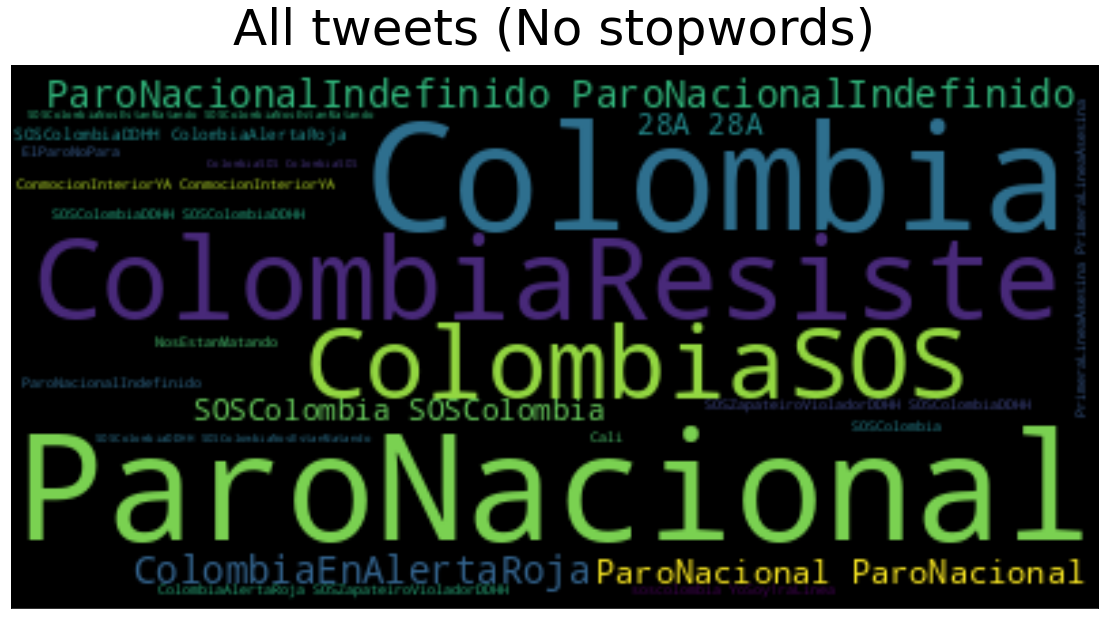

In [26]:
### Without stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(max_font_size = 100, max_words = 50).generate(text)
plt.imshow(img, interpolation = 'bilinear')
plt.title('All tweets (No stopwords)', fontsize = 50, pad = 20)
plt.xticks([]); plt.yticks([])
plt.show()

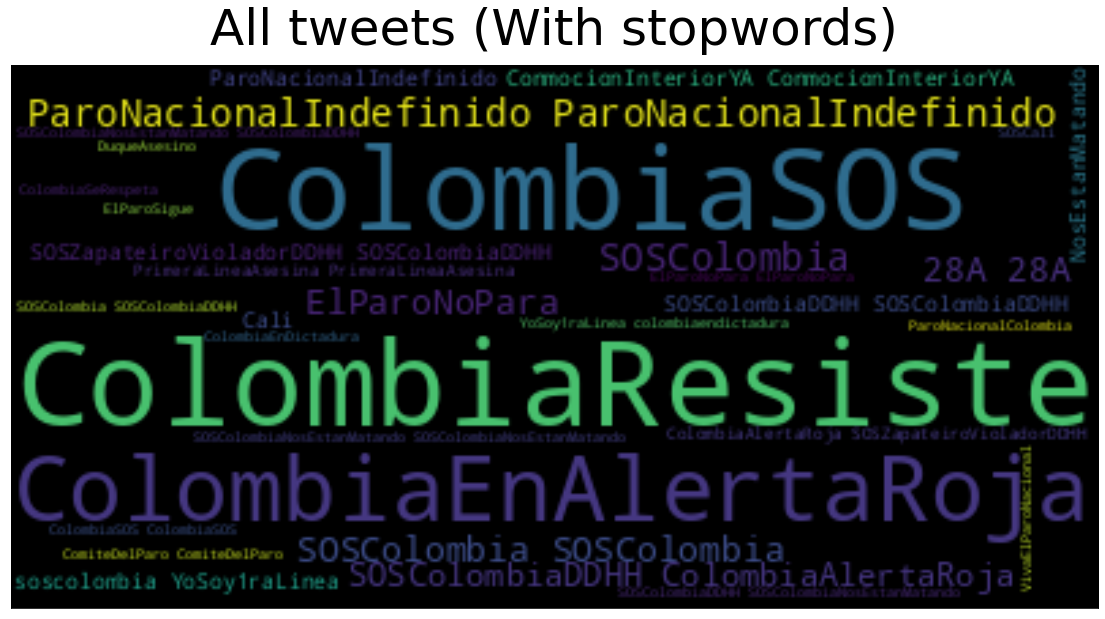

In [27]:
### With stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(stopwords = ['Colombia', 'ParoNaccional', 'ParoNacional'], max_words = 100, max_font_size = 100).generate(text)
plt.imshow(img, interpolation = 'bilinear')
plt.xticks([]); plt.yticks([])
plt.title('All tweets (With stopwords)',fontsize = 50, pad = 20)
plt.show()

# For positive tweets (sentiment score of 1)

In [29]:
p_text = ''
for f in p_g_data.loc[p_g_data['hashtags'].notnull(), 'hashtags']:
    f_tokens =  nltk.tokenize.WordPunctTokenizer().tokenize(f)
    p_text = ' '.join(f_tokens)

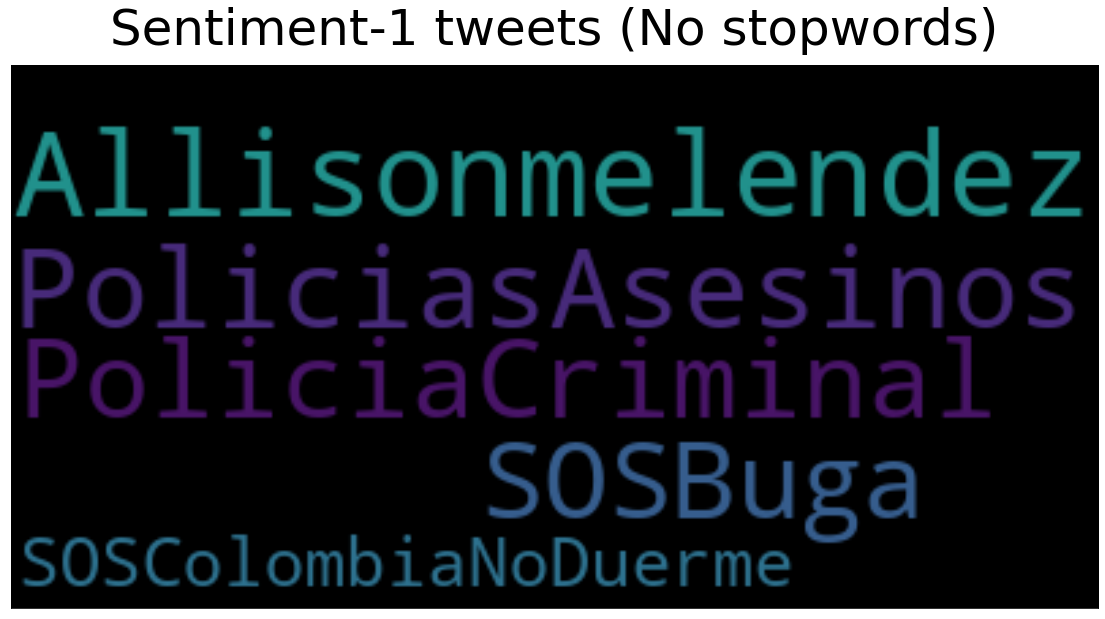

In [30]:
### Without stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(max_font_size = 100, max_words = 500).generate(p_text)
plt.imshow(img, interpolation = 'bilinear')
plt.xticks([]); plt.yticks([])
plt.title('Sentiment-1 tweets (No stopwords)', fontsize = 50, pad = 20)
plt.show()

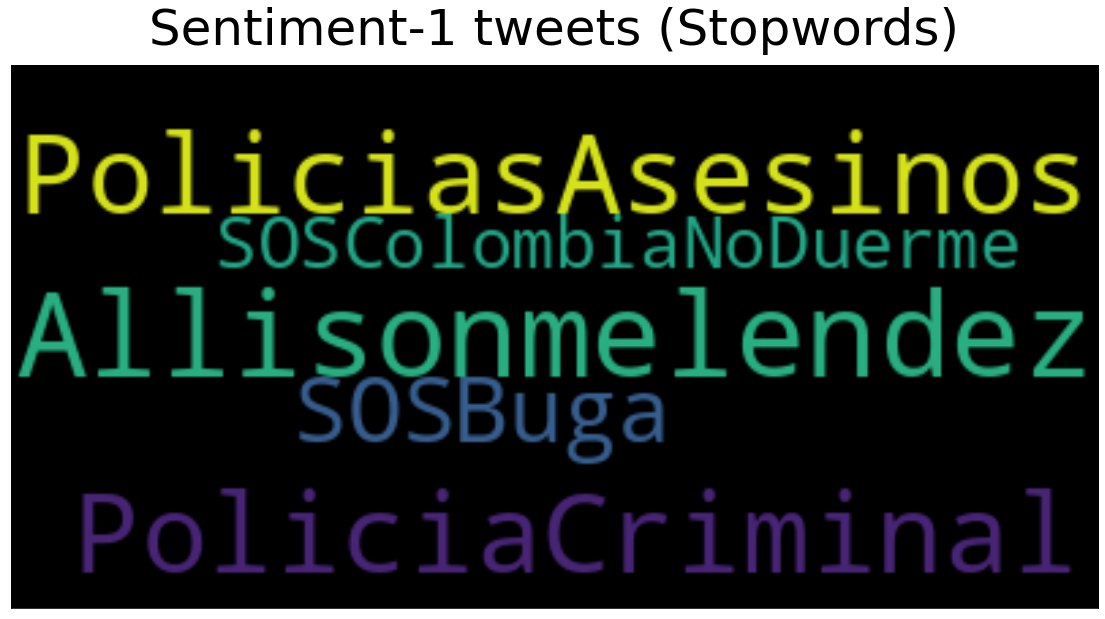

In [31]:
### With stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(max_font_size = 100, stopwords = ['Colombia', 'ParoNaccional', 'ParoNacional'], max_words = 300).generate(p_text)
plt.imshow(img, interpolation = 'bilinear')
plt.xticks([]); plt.yticks([])
plt.title('Sentiment-1 tweets (Stopwords)', fontsize = 50, pad = 20)
plt.show()

# For Negative Tweets (sentiment score of 0)

In [32]:
n_text = ' '.join([t for t in n_g_data.loc[n_g_data['hashtags'].notnull(), 'hashtags']])

In [33]:
n_text = ''
for f in n_g_data.loc[n_g_data['hashtags'].notnull(), 'hashtags']:
    f_tokens =  nltk.tokenize.WordPunctTokenizer().tokenize(f)
    n_text = ' '.join(f_tokens)

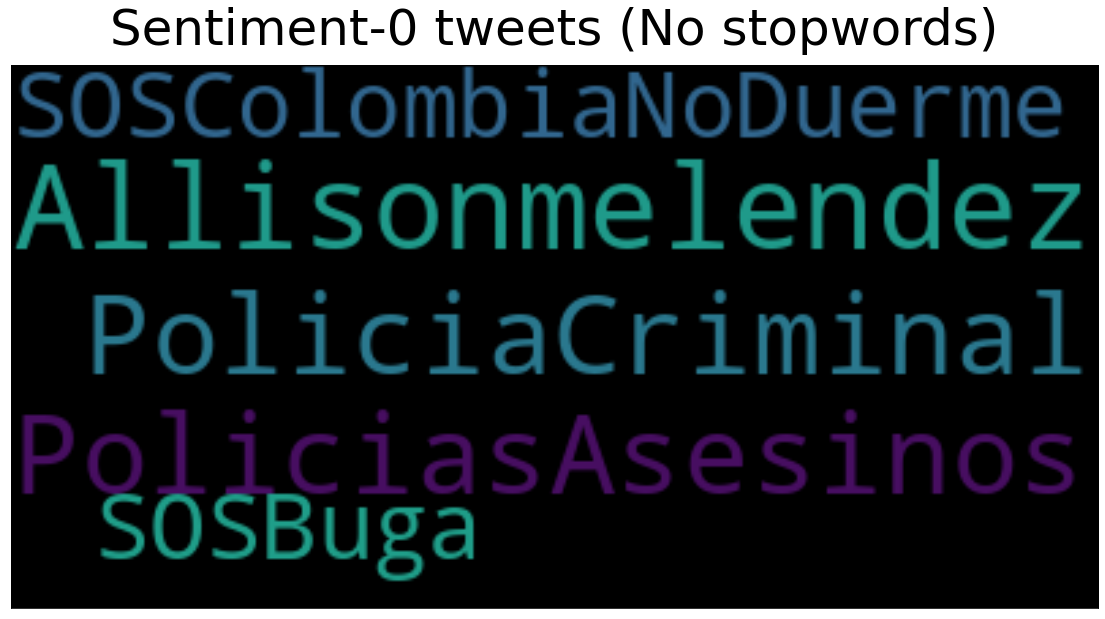

In [34]:
### Without stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(max_font_size = 100, max_words = 200).generate(n_text)
plt.imshow(img, interpolation = 'bilinear')
plt.xticks([]); plt.yticks([])
plt.title('Sentiment-0 tweets (No stopwords)', fontsize = 50, pad = 20)
plt.show()

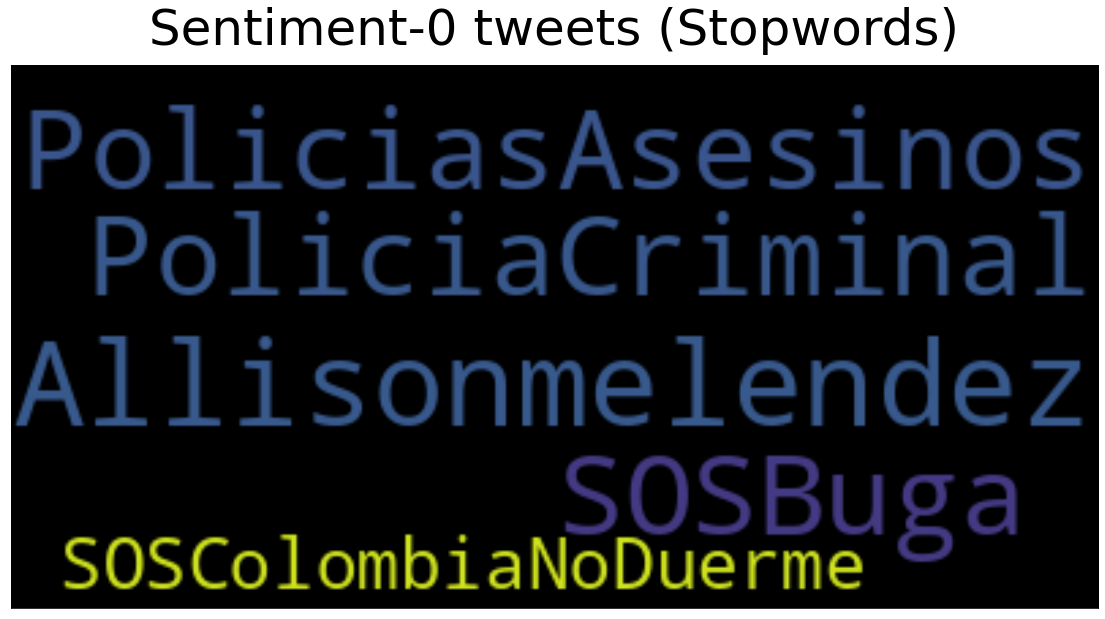

In [35]:
### With stopwords
plt.figure(figsize = (20, 10))
img = WordCloud(max_font_size = 100, stopwords = ['Colombia', 'ParoNaccional', 'ParoNacional'], max_words = 200).generate(n_text)
plt.imshow(img, interpolation = 'bilinear')
plt.xticks([]); plt.yticks([])
plt.title('Sentiment-0 tweets (Stopwords)', fontsize = 50, pad = 20)
plt.show()

From the wordclouds generated above a few inferences may be made:
1. One very important content of the tweets appears to be 'AllisonMelendez'. A quick Google search revealed her to be an actual person, who also happens to have a legal background. Perhaps she is in some way tied to the protests. More information may be garnered on that.
2. Another recurring theme amongst the tweets is the "PoliciaCriminal', in English, "criminal police'. This may imply that majority of the tweets were decries against police-related injustice.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60abf2bb-221c-4c99-afd2-0e3ff03991e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>